# Logistic Regression Implementation

An example binary classification problem can be represented by a dataset containing information about customers who did or did not default on their credit cards.  We want to do the following:

- Basic EDA: explore default groups for each individual feature (boxplots could be a nice way in here)
- Process categorical variables using `pd.get_dummies`
- Split your data
- Run a `LogisticRegression` to explore the likelihood of default based on the `balance` column.
- Cross validate this using values $[0.1, 1, 5, 10, 100]$ for the `C` parameter.
- Incorporate `PolynomialFeatures` into your model and rerun.  How did the performance change?
- Repeat for the `student` column.

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [42]:
df = pd.read_csv('data/default.csv')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


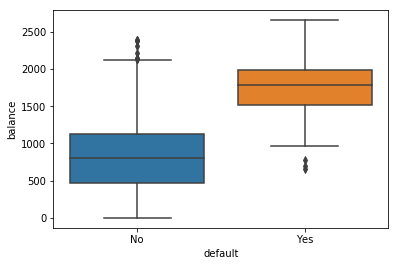

In [44]:
sns.boxplot('default', 'balance', data=df)

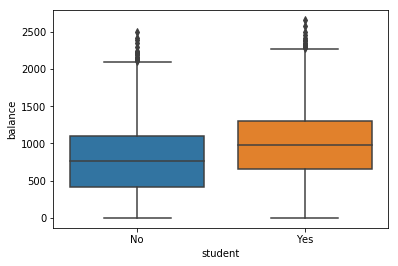

In [45]:
sns.boxplot('student', 'balance', data=df)

In [46]:
df = pd.get_dummies(df, drop_first=True)

In [47]:
df.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [48]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('default_Yes', axis=1), df.default_Yes)
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
lr.score(X_test, y_test)

0.9708

In [49]:
from sklearn.metrics import accuracy_score, recall_score, classification_report

In [50]:
recall_score(pred, y_test)

0.0

In [51]:
print(classification_report(pred, y_test))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99      2499
          1       0.00      0.00      0.00         1

avg / total       1.00      0.97      0.98      2500



In [52]:
df.default_Yes.value_counts()

0    9667
1     333
Name: default_Yes, dtype: int64

# the classification report makes it look like non-defaults were predicted perfectly, but it predicted that *noone* defaulted.  When we look at the actual data, 3.33% defaulted. 